In [1]:
from draw3d import *
from draw2d import *
from vectors import *
from math import *

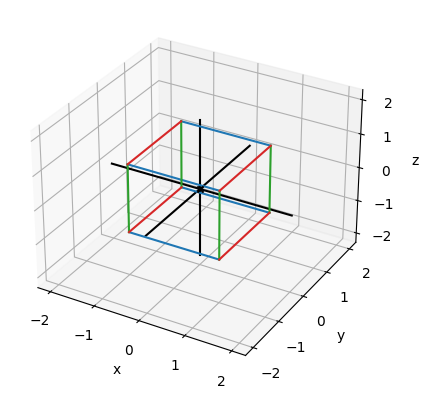

In [2]:
# Mini-project 3.2: There are exactly eight 3D vectors whose coordinates are all either +1 or -1. For instance, (1, -1, 1) is
# one of these. Plot all of these eight vectors as points. Then figure out how to connect them with line segments using
# Segment3D objects to form the outline of a cube.

options = [1, -1]
points = [(x,y,z) for z in options for y in options for x in options]
points2 = [(x,y,z) for x in options for y in options for z in options]
points3 = [(x,y,z) for z in options for x in options for y in options]

iter_points = iter(points)
segments = []

for x, y in zip(iter_points, iter_points):
    segments.append(Segment3D(x,y, color=blue))

iter_points2 = iter(points2)
for x, y in zip(iter_points2, iter_points2):
    segments.append(Segment3D(x,y, color=green))

iter_points3 = iter(points3)
for x, y in zip(iter_points3, iter_points3):
    segments.append(Segment3D(x,y, color=red))

draw3d(
    *segments,
)

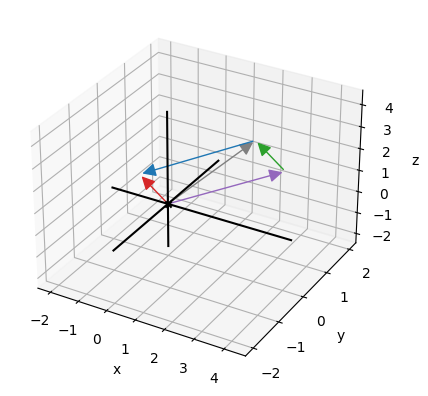

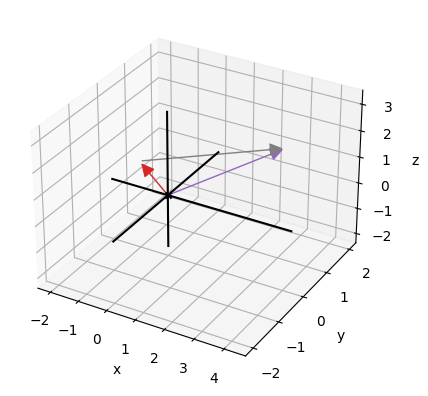

In [3]:
# Exercise 3.3: Draw (4, 0, 3) and (-1, 0, 1) as Arrow3D objects, such that they are placed tip-to-tail in both orders in 3D.
# What is their vector sum?

point_1 = (4, 0, 3) 
point_2 = (-1, 0, 1)
point_sum = add(*[point_1, point_2])
point_sub = subtract(*[point_1, point_2])

draw3d(
    Arrow3D(point_2, color=red),
    Arrow3D(point_1, color=purple),
    Arrow3D(point_sum, color=gray),
    Arrow3D(point_2, tail=point_sum, color=blue),
    Arrow3D(point_sum, tail=point_1, color=green)
)


# v - w = q
# => follow q to get from w to v

draw3d(
    Arrow3D(point_2, color=red),
    Arrow3D(point_1, color=purple),
    Arrow3D(add(*[point_sub, point_2]), tail=point_2, color=gray),
)

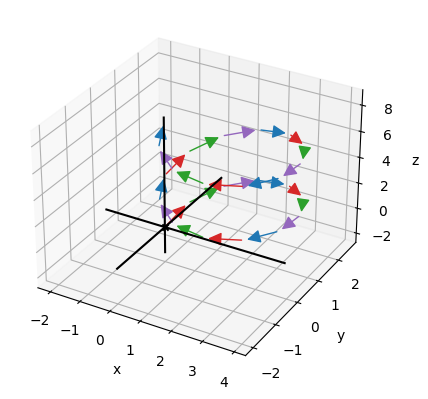

In [4]:
# Exercise 3.4: Suppose we set vectors1=[(1,2,3,4,5),(6,7,8,9,10)] and
# vectors2=[(1,2),(3,4),(5,6)]. Without evaluating in Python, what are the lengths of zip(*vectors1) and
# zip(*vectors2)?

vectors1=[(1,2,3,4,5),(6,7,8,9,10)] # => 5
vectors2=[(1,2),(3,4),(5,6)] # => 2

# Mini-project 3.5: The following comprehension creates a list of 24 Python vectors:
# from math import sin, cos, pi
# vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]
# What is the sum of the 24 vectors? Draw all 24 of them tip-to-tail as Arrow3D objects.

vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0,24)]

prev = (0,0,0)
arrows = []
clrs = [red,green,purple,blue]

for i, (x,y,z) in enumerate(vs):
    clr = clrs[i % (len(clrs))]
    new_coords = add(*[prev, (x,y,z)])
    arrows.append(Arrow3D(new_coords, tail=prev, color=clr))
    prev = new_coords

draw3d(*arrows)

In [5]:
# Exercise 3.6: Write a function scale(scalar,vector) that returns the input scalar times the input vector.
# Specifically, write it so it works on 2D or 3D vectors, or vectors of any number of coordinates.


def scale(scalar, vector):
   return tuple(scalar * coor for coor in vector)


# Exercise 3.8: Try to find the answers for this exercise without using code and then check your work. What is the length
# of the 2D vector (1, 1)? What is the length of the 3D vector (1, 1, 1)? We haven’t yet talked about 4D vectors, but these
# have four coordinates instead of two or three. If you had to guess, what is the length of the 4D vector with coordinates
# (1, 1, 1, 1)?


length_2d = sqrt(1**2 + 1**2)
length_3d =  sqrt(sqrt(1**2 + 1**2)**2 + 1**2) # sqrt(3)
length_4d =  sqrt(4)


# Mini-project 3.9: The coordinates 3, 4, 12 in any order create a vector of length 13, a whole number. This is unusual
# because most numbers are not perfect squares, so the square root in the length formula typically returns an irrational
# number. Find a different triple of whole numbers that define coordinates of a vector with a whole number length.

max_coords = 100
length = 0
whole_coords = []


for x in range(1,max_coords):
   for y in range(1,x+1):
      for z in range(1,y+1):
         length = sqrt(x**2 + y**2 + z**2)
         if length%1 == 0:
            whole_coords.append((x,y,z))

print(len(whole_coords))


869


In [ ]:
# Exercise 3.11: Based on the following picture, rank u ∙ v, u ∙ w, and v ∙ w from largest to smallest:

#  v.u => v.w => u.w 

# Exercise 3.12: What is the dot product of (-1, -1, 1) and (1, 2, 1)? Are these two 3D vectors separated by more than 90°,
# less than 90°, or exactly 90°?

# -2 => more then 90

# Mini-project 3.13: For two 3D vectors u and v, the values of (2u) ∙ v and u ∙ (2v) are both equal to 2(u ∙ v). In this case, u ∙ v
# = 18 and both (2u) ∙ v and u ∙ (2v) are 36, twice the original result. Show that this works for any real number s, not just 2.
# In other words, show that for any s the values of (su) ∙ v and u ∙ (sv) are both equal to s(u ∙ v)
'''
u=(a,b,c)
v=(d,f,g)

[u ∙ (sv)] = s(u ∙ v)
[(su) ∙ v] = s(u ∙ v)

[u ∙ (sv)] = s(u ∙ v)
(a,b,c) ∙ (sd,sf,sg) = s . [(ad) + (bf) + (cg)] 
(a,b,c) ∙ (sd,sf,sg) = s . [(ad) + (bf) + (cg)] 
(asd) + (bsf) + (csg) = s . [(ad) + (bf) + (cg)] (distributiviteit) 
'''

# Mini-project 3.14: Explain algebraically why the dot product of a vector with itself is the square of its length

'''
u=(a,b,c)
a**2 + b**2 + c**2

length_1 = sqrt(a**2 + b**2)
length_2 = sqrt(length_1**2 + c**2) = sqrt(a**2 + b**2 + c**2)
sqrt(a**2 + b**2 + c**2)**2 = a**2 + b**2 + c**2

'''

# Mini-project 3.15: Find a vector u of length 3 and a vector v of length 7 such that u ∙ v = 21. Find another pair of vectors
# u and v such that u ∙ v = -21. Finally, find three more pairs of vectors of respective lengths 3 and 7 and show that all of
# their lengths lie between -21 and 21.

v_length = 3
u_length = 7

u * v = 21

max_range = 100

point_of_v = []
point_of_u = []


for x in range(1, max_range):
    for y in range(1, x):
        lngth = length_point((x, y)) 
        if lngth == v_length:
            point_of_v.append(lngth);
        if lngth == u_length:
            point_of_u.append(lngth);



SyntaxError: cannot assign to operator (<ipython-input-13-a012b913bde1>, line 45)

In [ ]:
# Exercise 3.16: Let u and v be vectors, with |u| = 3.61 and |v| = 1.44. If the angle between u and v is 101.3°, what is u ∙
# v?
# a. 5.198
# b. 5.098
# c. -1.019
# d. 1.019

u = (0,0);
v = (0,0);

u_length = 3.61
v_length = 1.44

theta_degrees = 101.3
theta_radians = radians(101.3)

# Solution: Again, we can plug these values into the new dot product formula and, with the appropriate conversion to
# radians, evaluate the result in Python:
# >>> 3.61 * 1.44 * cos(101.3 * pi / 180)
# -1.0186064362303022
# Rounding to three decimal places, the answer agrees with c.


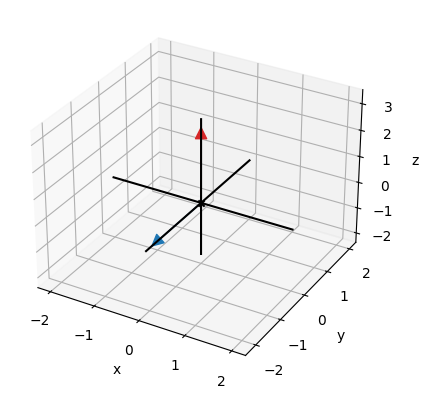

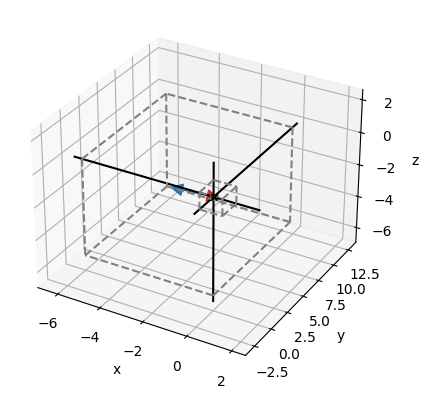

In [ ]:
# Exercise 3.21: In what direction does the result of (0, 0, 3) × (0, -2, 0) point?
u = (0, 0, 3) 
v = (0, -2, 0)
draw3d(
    Arrow3D(u, color=red),
    Arrow3D(v, color=blue)
)

# positive x direction
# thumb points to right  

# Exercise 3.22: What are the coordinates of the cross product of (1, -2, 1) and (-6, 12, -6)?
a = (1, -2, 1) 
b = (-6, 12, -6)
draw3d(
    Arrow3D(a, color=red),
    Arrow3D(b, color=blue),
    Box3D(*a),
    Box3D(*b)
)

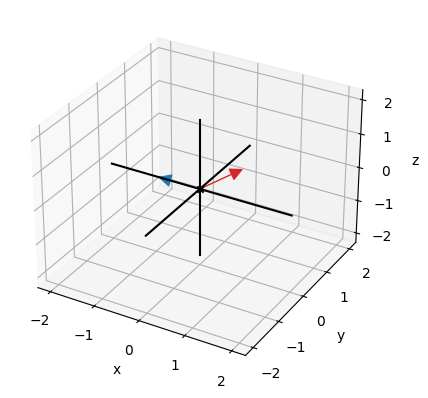

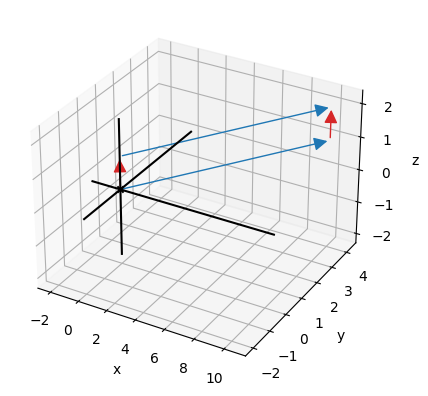

In [ ]:
# Exercise 3.22: What are the coordinates of the cross product of (1, -2, 1) and (-6, 12, -6)?

'''
a = (1, -2, 1)
b = scalar(*[a], -6)
'''

# because b is a scalar vectors a and b don't cover any area which results in length one
# the only vector with length one is (0,0,0)

# Mini-project 3.23: The area of a parallelogram is equal to the length of its base times its height as shown here:
# Given that, explain why the formula |u| ∙ |v| ∙ sin(θ) makes sense.


'''
sin(θ) = overstaande / schuine 
|u| = basis
|v| = schuine
hoogte = overstaande
hoogte = schuine * sin(θ) = |v| * sin(θ)

parallelogram = basis * hoogte
parallelogram =  |u| * |v| * sin(θ)
'''

# Exercise 3.24: What is the result of the cross product (1, 0, 1) × (-1, 0, 0)?

u = (1, 0, 1)
v = (-1, 0, 0)
draw3d(
    Arrow3D(u, color=red),
    Arrow3D(v, color=blue)
)

'''
These vectors lie in the x,z plane, so their cross product lies on the y-axis

We could find the lengths of the vectors and the angle between them to get the size of the cross product, but we
already have the base and height from the coordinates. These are both 1, so the length is 1. The cross product is,
therefore, (0, -1, 0), a vector of length 1 in the -y direction; the answer is b.
'''

# Exercise 3.25: Use the Python cross function to compute (0, 0, 1) × v for a few different values of a second vector v.
# What is the z-coordinate of each result, and why?


u = (0, 0, 1)
v = (10, 4, 1)

draw3d(
    Arrow3D(u, color=red),
    Arrow3D(v, color=blue),
    Arrow3D(add(u, v), tail=v, color=red),
    Arrow3D(add(u, v), tail=u, color=blue),
)

# solution will always be perpendicular to both u and v 

In [ ]:
# Mini-project 3.26: Show algebraically that u × v is perpendicular to both u and v regardless of the coordinates of u and
# v. (Hint: show (u × v) ∙ u and (u × v) ∙ v by expanding these into coordinates).

In [1]:
from draw3d import *
from draw2d import *
from vectors import *
from math import *



(1.4142135623730951, 1.308996938995747)
(3.605551275463989, 1.5063924988456279)
[(0.36602540378443893, 1.3660254037844386), (0.23205080756887753, 3.598076211353316)]
(1.0, 0.5235987755982988)
(1.0, 2.0943951023931953)
[(0.36602540378443893, 1.3660254037844386), (0.23205080756887808, 3.598076211353316)]
